In [7]:
import numpy as np
import matplotlib.pyplot as plt
import joblib.numpy_pickle as joblib
import torch
import torch.nn as nn
import cupy as cp
print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

import autoencoder_functions
import seperate_spec_and_features
import prediction_results
import features_single
print(torch.__version__)

True
Using device: cuda
2.4.1


In [6]:
usv_feature = cp.array([15,1])
print(usv_feature.shape[0])

2


In [11]:
#load specs and features for both the shank3 and pups dataset

#### SHANK3
usvs_shank3 = joblib.load('shank3USVs_many_properties.jl')
# features_shank3 = joblib.load('shank3USVs_hardcoded_features')
emitter_library_shank3 = joblib.load('emitter_library_shank3')
emitter_library_shank3_individual = joblib.load('emitter_library_shank3_individual')

#### PUPS
usvs_pups = joblib.load('emitter_and_specs.jl')
# features_pups = joblib.load('pups_hardcoded_features')
emitter_library_pups_individual = joblib.load('emitter_library_pups_individual')

In [13]:
#seperate specs and emitter for both datasets

#### SHANK3
spec, emitter, distance_to_nearest_non_emitter, duration, start_time_in_recording, end_time_in_recording, intensities, intensity, location, main_freq, recording_path= seperate_spec_and_features.separate_spec_and_features(usvs_shank3)
spec_shank3 = spec
emitter_shank3 = emitter

#### PUPS
spec, emitter = seperate_spec_and_features.seperate_spec_and_emitter_pups(usvs_pups)
spec_pups = spec
emitter_pups = emitter

del spec, emitter, distance_to_nearest_non_emitter, duration, start_time_in_recording, end_time_in_recording, intensities, intensity, location, main_freq, recording_path

In [18]:
random_index = np.random.random_integers(len(spec_shank3))
print(random_index)
usv_feature = features_single.get_usv_features(spec_shank3[random_index])

#To extract shank3 traditional features
features_shank3 = cp.zeros((len(spec_shank3), usv_feature.shape[0], usv_feature.shape[1]), dtype=cp.float32)
for spec in range(len(spec_shank3)):
    if spec % 100 == 0:
        print(spec)
    feature_shank3 = features_single.get_usv_features(spec_shank3[spec])
    features_shank3[spec] = feature_shank3
print(features_shank3.shape)
joblib.dump(features_shank3, 'shank3USVs_hardcoded_features')

#To extract pups traditional features
features_pups = cp.zeros((len(spec_pups), usv_feature.shape[0], usv_feature.shape[1]), dtype=cp.float32)
for spec in range(len(spec_pups)):
    if spec % 100 == 0:
        print(spec)
    feature_pups = features_single.get_usv_features(spec_pups[spec])
    features_pups[spec] = feature_pups
print(features_pups.shape)
joblib.dump(features_pups,'pups_hardcoded_features')

C:\Users\ruben\AppData\Local\Temp\ipykernel_7324\3825643713.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 50473 + 1) instead
  random_index = np.random.random_integers(len(spec_shank3))


17921
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18

['pups_hardcoded_features']

In [19]:
### MAKE SURE SPEC AND EMITTERS AND FEATURES ARE ALL OF THE SAME SIZE
assert len(spec_shank3) == len(emitter_shank3) == len(features_shank3), "The lengths of the lists are not equal."
assert len(spec_pups) == len(emitter_pups) == len(features_pups), "The lengths of the lists are not equal."

In [20]:
#### give the folder in which the models are saved for making predictions

#### SHANK3 trained with labels 0 and 1 for WT
# path_to_model_shank3 = 'Shank3_24_final'
path_to_model_shank3 = 'final_models/Shank3_8_v0'

#### PUPS trained with label numbers for each individual emitter
path_to_model_pups = 'final_models/pups_8_v0'

#BELOW 4 PREDICTION FIGURES FOR THE SHANK3 DATASET WILL BE MADE: strain_prediction_model, strain_prediction_hardcoded, emitter_prediction_model and
# emitter_prediction_hardcoded

#THERE WILL ALSO BE 2 PREDICTION FIGURES FOR THE PUPS DATASET: emitter_prediction_model_pups and emitter_prediction_hardcoded_pups

# FOR ALL FIGURES FEMALE SPECTROGRAMS WILL BE REMOVED AND THERE WILL BE 6 SEPERATE FUNCTIONS FOR EACH FIGURE IN prediction_results.py

c:\Users\ruben\Documents\Internship\Git repository\VAELiveScope\prediction_results.py:1613: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  spec_indices_train = torch.load(pat

indices before removal of doubles = 31202
indices after removal of doubles = 31202
The same labels are present in both labels_train and labels_test.
Total: 6687
Number of spectograms: 6687
True
random_index: 4834
54


c:\Users\ruben\Documents\Internship\Git repository\VAELiveScope\autoencoder_functions.py:116: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = GradScaler() ###
c:\Users\ruben\Documents\Internship\Git repository\VAELiveScope\prediction_results.py:1742: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe

[]
(6687, 15)
!!! Zero standard deviation detected in columns: [] !!!
(6687, 2)
[[ 3.851088  14.033069 ]
 [14.8233    10.356634 ]
 [ 2.9083989 12.706001 ]
 ...
 [ 9.464954   7.97485  ]
 [ 4.4860873 13.607894 ]
 [ 6.960491  13.589595 ]]
-2.4790523 1.9519587
16.997902 14.5516205


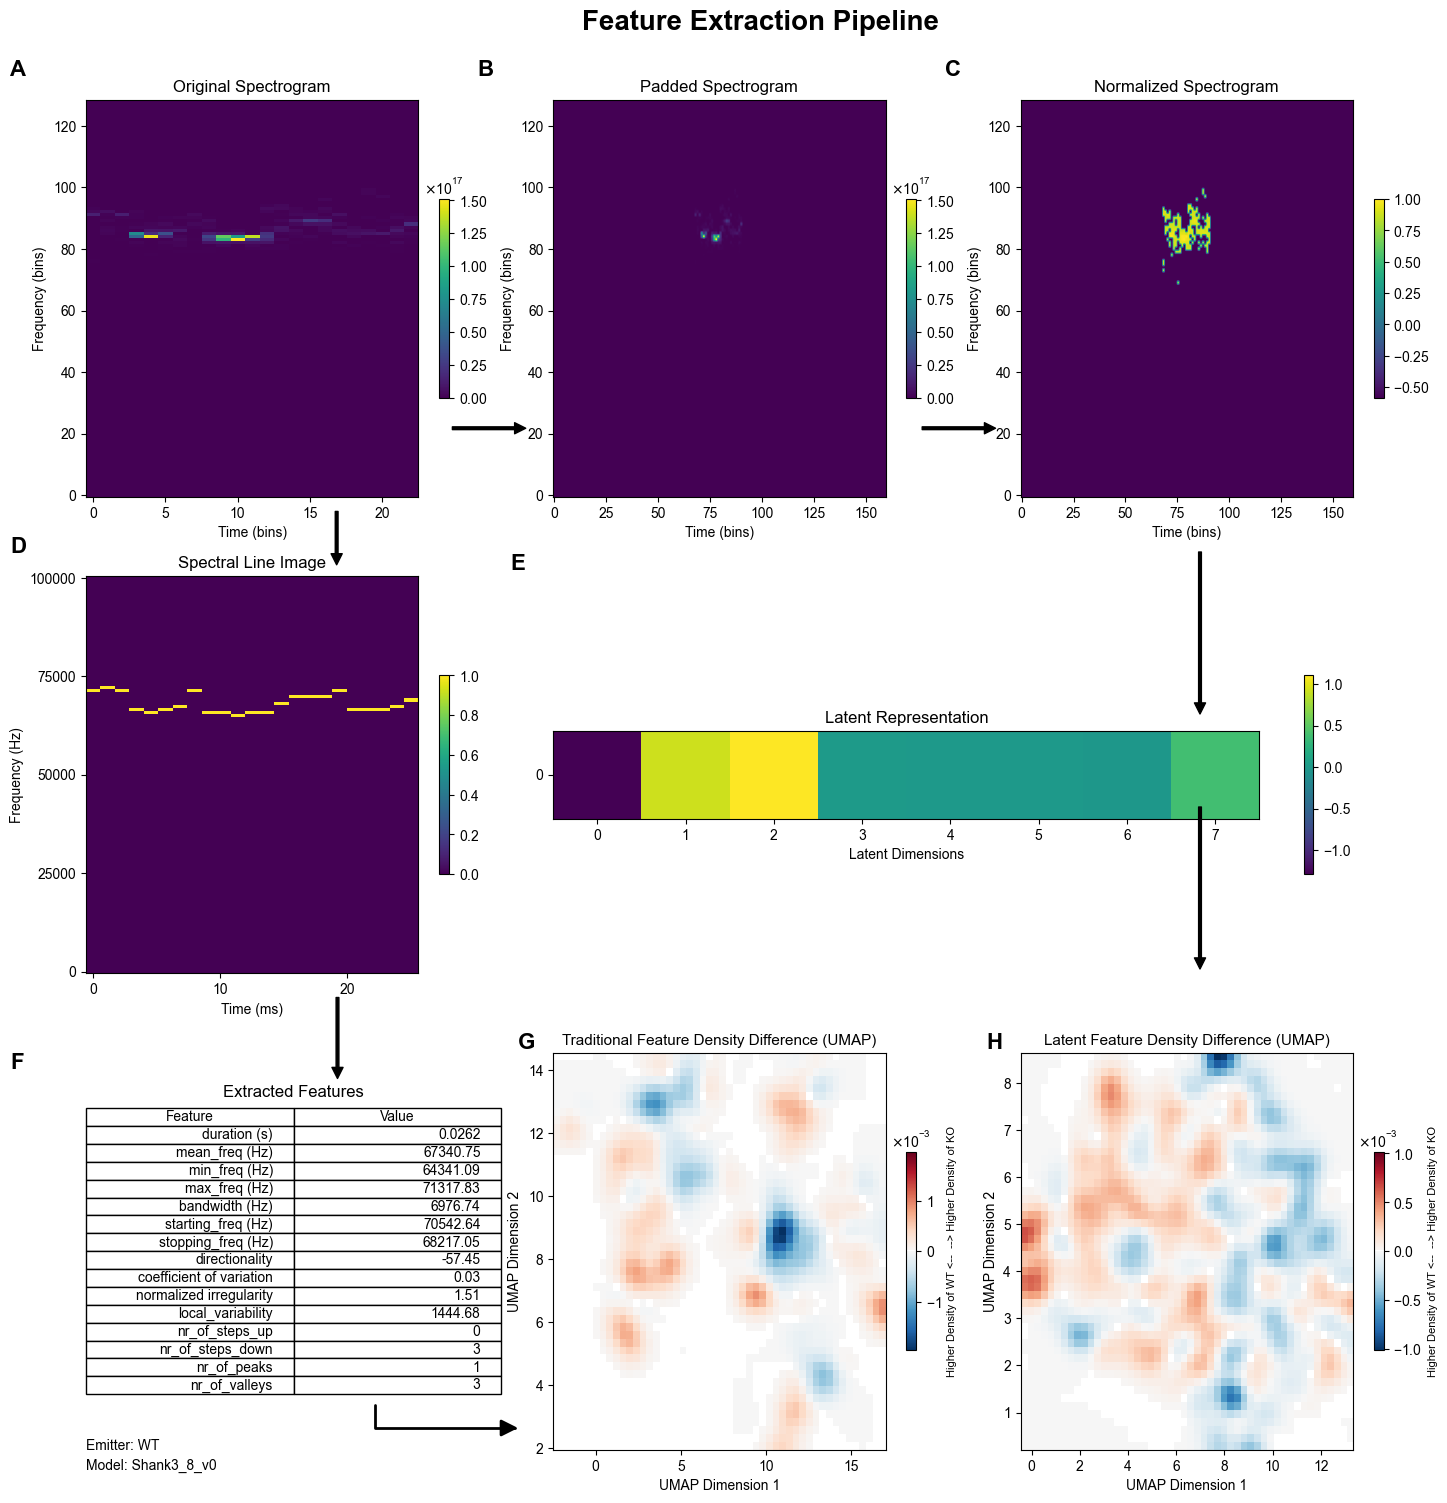

In [21]:
prediction_results.from_voc_to_latent_vis_strain(spec_shank3, emitter_shank3, emitter_library_shank3, path_to_model_shank3, combine_train_test = False)